In [29]:
import numpy as np
import matplotlib.pyplot as plt
import math as math

from sympy import symbols, Matrix

import picos

%matplotlib widget
plt.rcParams['grid.linewidth'] = 0.8

In [30]:
## Graph setup
vertices = {1,2,3,4,5} # Vertices
edges = [(1,2),(1,3),(1,4),(1,5),(1,6),(2,3),(2,4),(2,5),(3,4),(3,5),(4,5)] # Edges


In [31]:
## Positions
p1 = np.array([0,0,1])
p2 = np.array([1,0,0])
p3 = np.array([-1/2,np.sqrt(3)/2,0])
p4 = np.array([-1/2,-np.sqrt(3)/2,0])
p5 = np.array([0,0,-1])

p = np.array([p1,p2,p3,p4,p5])
pbar = np.column_stack((p,np.ones(len(vertices))))

In [32]:
## Graph setup
vertices = {1,2,3,4,5,6} # Vertices
edges = [(1,2),(1,3),(1,4),(1,5),(1,6),(2,3),(2,4),(2,5),(2,6),(3,4),(3,5),(3,6),(4,5),(4,6),(5,6)] # Edges


In [33]:
## Positions
p1 = np.array([0,0,1])
p2 = np.array([0,1,0])
p3 = np.array([0,-1,0])
p4 = np.array([1,0,0])
p5 = np.array([-1,0,0])
p6 = np.array([0,0,-1])

# p1 = np.array([-1,1])
# p2 = np.array([-1,-1])
# p3 = -p1
# p4 = -p2

p = np.array([p1,p2,p3,p4,p5,p6]) 
# p = np.array([p1,p2,p3,p4]) 

pbar = np.column_stack((p,np.ones(len(vertices))))

In [34]:
# # Definir vértices y aristas
# vertices = {1, 2, 3, 4, 5}
# edges = [
#     (1, 2), (1, 3), (1, 4), (1, 5),
#     (2, 3), (2, 4), (2, 5),
#     (3, 4), (3, 5),
#     (4, 5)
# ]

# # Definir posiciones arbitrarias para visualización
# pen = {
#     1: np.array([0, 0, 0]),
#     2: np.array([1, 0, 0]),
#     3: np.array([0, 1, 0]),
#     4: np.array([0, 0, 1]),
#     5: np.array([1, 1, 1])
# }


# # Extraer posiciones de los vértices
# p = np.array([pen[i] for i in vertices])

# pbar = np.column_stack((p,np.ones(len(vertices))))

In [35]:
## Incidence Matrix 
H = np.zeros([len(vertices),len(edges)]) # H is defined as a +-1 matrix, where the rows indicate the vertices and the columns, the edges. The sign is due to convention an indicates that it is a directed graph.
for i in enumerate(edges): # First element from enumerate indicates edge index, the other is the vertices connected by it
    H[i[1][0]-1, i[0]] = 1 # i[1][0]-1 takes the first vertex index connected by the edge, the second element associates an edge to it. +1 due to convention
    H[i[1][1]-1, i[0]] = -1 # i[1][0]-1 takes the second vertex index connected by the edge, the second element associates an edge to it. -1 due to convention
Matrix(H)

Matrix([
[ 1.0,  1.0,  1.0,  1.0,  1.0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
[-1.0,    0,    0,    0,    0,  1.0,  1.0,  1.0,  1.0,    0,    0,    0,    0,    0,    0],
[   0, -1.0,    0,    0,    0, -1.0,    0,    0,    0,  1.0,  1.0,  1.0,    0,    0,    0],
[   0,    0, -1.0,    0,    0,    0, -1.0,    0,    0, -1.0,    0,    0,  1.0,  1.0,    0],
[   0,    0,    0, -1.0,    0,    0,    0, -1.0,    0,    0, -1.0,    0, -1.0,    0,  1.0],
[   0,    0,    0,    0, -1.0,    0,    0,    0, -1.0,    0,    0, -1.0,    0, -1.0, -1.0]])

In [36]:
E =pbar.T @ H @ np.diag(H[0,:]) # Creating the first element from which the matrix will be built.

for i in range(1, len(vertices)): # Using a loop with a range from 1 to add the next elements
    E = np.append(E,pbar.T @ H @ np.diag(H.T[:,i]), axis = 0)

Matrix(E)

Matrix([
[   0,    0, -1.0,  1.0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
[-1.0,  1.0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
[ 1.0,  1.0,  1.0,  1.0,  2.0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
[   0,    0,    0,    0,    0,    0, -1.0,  1.0,    0,    0,    0,    0,    0,    0,    0],
[ 1.0,    0,    0,    0,    0,  2.0,  1.0,  1.0,  1.0,    0,    0,    0,    0,    0,    0],
[-1.0,    0,    0,    0,    0,    0,    0,    0,  1.0,    0,    0,    0,    0,    0,    0],
[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
[   0,    0,    0,    0,    0,    0,    0,    0,    0, -1.0,  1.0,    0,    0,    0,    0],
[   0, -1.0,    0,    0,    0, -2.0,    0,    0,    0, -1.0, -1.0, -1.0,    0,    0,    0],
[   0, -1.0,    0,    0,    0,    0,    0,    0,    0,    0,    0,  1.0

In [37]:
## SVD (Singular Value Decomposition)
U, S, Vt = np.linalg.svd(E)

rank = np.linalg.matrix_rank(E)
Z = Vt[rank:,:].T # This z should represent a basis of the nullspace of E. To check it: E @ Z = 0
Matrix(E@Z) # The values obtained are either 0 or very close to it. Why is this? Maybe due to svd or machine error --> check later

Matrix([
[-2.22044604925031e-16,  4.44089209850063e-16, -2.77555756156289e-16],
[ 1.66533453693773e-16,                     0,  1.66533453693773e-16],
[ 4.44089209850063e-16, -2.63677968348475e-16, -5.55111512312578e-17],
[                    0,                     0,                     0],
[ 1.52655665885959e-16, -1.66533453693773e-16,  1.11022302462516e-16],
[-2.77555756156289e-16,  -2.4980018054066e-16,                     0],
[ 1.11022302462516e-16, -2.77555756156289e-17,  2.22044604925031e-16],
[                    0,                     0,                     0],
[-5.55111512312578e-17, -1.66533453693773e-16,                     0],
[-1.66533453693773e-16,  3.33066907387547e-16, -1.11022302462516e-16],
[-5.55111512312578e-17,                     0,  5.55111512312578e-17],
[                    0,                     0,                     0],
[ 2.22044604925031e-16, -2.08166817117217e-16,  2.77555756156289e-16],
[  2.4980018054066e-16, -5.55111512312578e-17,  2.77555756156289e-17

In [38]:
Up, Sp, Vtp = np.linalg.svd(pbar)

d = len(p[0]) # Dimensions
U1 = Up[:,:1+d] # The first 1+d columns are U1
U2 = Up[:, 1+d:] # The rest of the columns are U2

In [39]:
# In this case Z only has 1 column, but in case there were more, we have to make a loop for each column.
M = [] # We create it as a list so it will be storing each matrix resulting from each i separatedly, that way we will be able to call it after individually.
for i in range(Z.shape[1]): # Loops for each column of Z
    M.append(U2.T @ H @ np.diag(Z[:,i]) @ H.T @ U2)
M

[array([[0.1273914 , 0.19234319],
        [0.19234319, 1.61678535]]),
 array([[ 1.57599634,  0.2799846 ],
        [ 0.2799846 , -0.02329019]]),
 array([[-0.44722139,  1.04144742],
        [ 1.04144742, -0.29234001]])]

In [40]:
## LMI problem M_i * c_i > 0, solve with PICOS

P = picos.Problem()
c = picos.RealVariable("c", len(M))
M_i = [picos.Constant(Mi) for Mi in M]
Sum = picos.sum(c[i] * M_i[i] for i in range(len(M_i)))
P.add_constraint(Sum>>0)
print(P)
P.solve()

ci = np.array([c.np])

Feasibility Problem
  find an assignment
  for
    3×1 real variable c
  subject to
    ∑(c[i]·[2×2] : i ∈ [0…2]) ≽ 0


In [41]:
try:
    w = sum(ci[i] * Z[:,i] for i in range(len(c)))
except:
    w = [sum(Z[:,i]*ci[0][i] for i in range(Z.shape[1]))]
    w = w[0]

In [42]:
Omega = H @ np.diag(w) @ H.T

In [43]:
Matrix(Omega)

Matrix([
[  0.3333333333,    -0.16666666665, -0.16666666665, -0.16666666665,    -0.16666666665,   0.3333333333],
[-0.16666666665, 0.333333333299999,   0.3333333333, -0.16666666665,    -0.16666666665, -0.16666666665],
[-0.16666666665,      0.3333333333,   0.3333333333, -0.16666666665,    -0.16666666665, -0.16666666665],
[-0.16666666665,    -0.16666666665, -0.16666666665,   0.3333333333,      0.3333333333, -0.16666666665],
[-0.16666666665,    -0.16666666665, -0.16666666665,   0.3333333333, 0.333333333299999, -0.16666666665],
[  0.3333333333,    -0.16666666665, -0.16666666665, -0.16666666665,    -0.16666666665,   0.3333333333]])

In [44]:
from mpl_toolkits.mplot3d import Axes3D

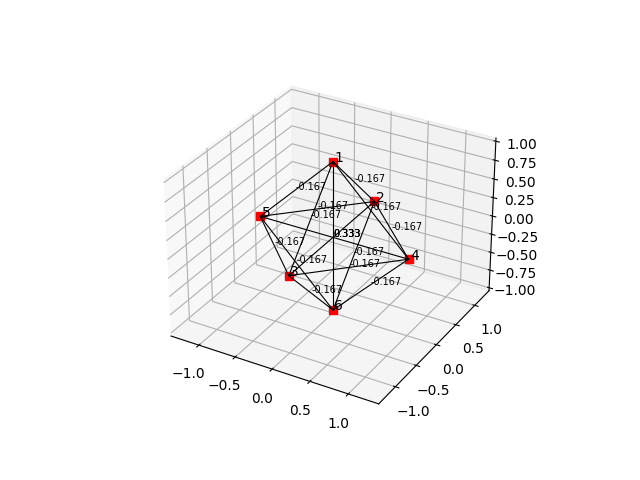

In [45]:
Prs = np.reshape(p, [3 * p.shape[0], 1])  # posiciones de referencia apiladas
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Ploteo de los puntos
ax.plot(p[:, 0], p[:, 1], p[:, 2], "sr")
for i in enumerate(p):
    ax.text(x=i[1][0] + 0.02, y=i[1][1], z=i[1][2], s=str(i[0] + 1))

# Ploteo de las aristas
for j in enumerate(edges):
    nodex = p[[j[1][0] - 1, j[1][1] - 1], 0]
    nodey = p[[j[1][0] - 1, j[1][1] - 1], 1]
    nodez = p[[j[1][0] - 1, j[1][1] - 1], 2]
    ax.plot(nodex, nodey, nodez, linestyle = "-", color = "black", linewidth = 0.8)
    ax.text(x=np.mean(nodex), y=np.mean(nodey), z=np.mean(nodez), 
            s=str(round(Omega[j[1][0] - 1, j[1][1] - 1], 3)), 
            rotation=180 + 180 * float(np.arctan2(p[j[1][0] - 1, 1] - p[j[1][1] - 1, 1], 
                                                   p[j[1][0] - 1, 0] - p[j[1][1] - 1, 0]) / np.pi), fontsize = 7)
plt.axis("equal")
plt.show()

(6, 6)
(18, 18) 



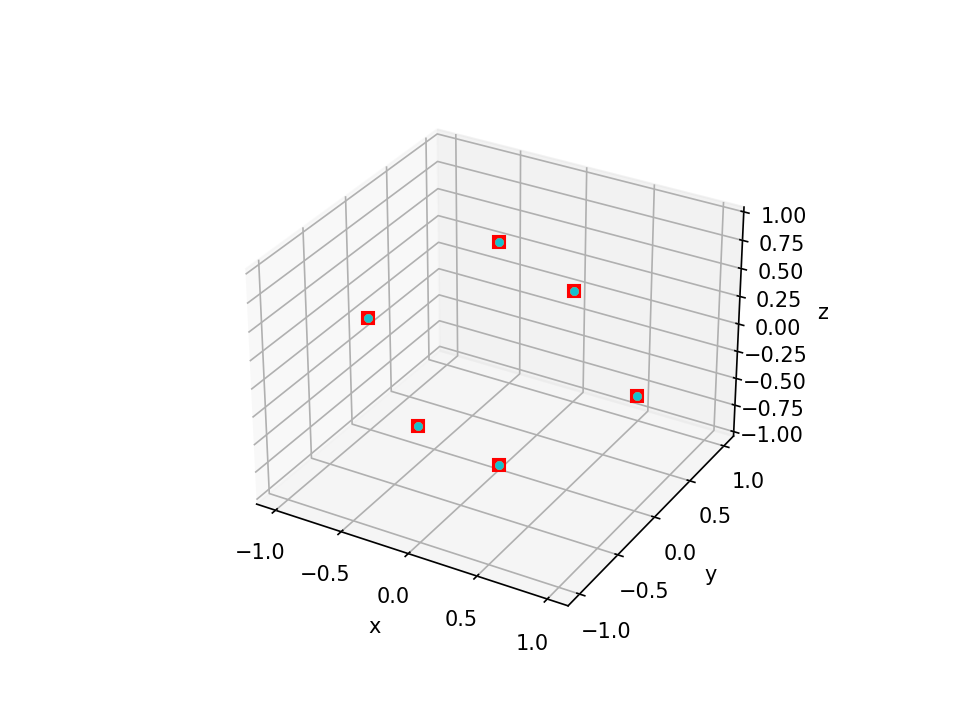

In [46]:
I = np.eye(3)
Lbar = np.kron(Omega, I)
print(Omega.shape)
print(Lbar.shape, "\n")  # should be pmxqm, where p and q = 5 and m = 2 (dim of the system)

# Constante de ganancia arbitraria
h = 5

# Apilamiento de las posiciones iniciales
pstack = np.array([p.flatten()]).T

# Derivada de p
pdot = -h * Lbar @ pstack

# Copia de pstack para las actualizaciones
Pt = pstack.copy()

# Parámetros de tiempo
t = 0
tf = 1000
dt = 0.01
tp = tf / 1000

# Configuración de la figura 3D
fig = plt.figure(dpi=150)
ax = fig.add_subplot(111, projection='3d')

# Ploteo de las posiciones iniciales
ax.plot(Pt[0::3, 0], Pt[1::3, 0], Pt[2::3, 0], 'sr', linewidth=0.1)

# Bucle de integración temporal
while t <= tf:
    t += dt
    if t >= tp:
        ax.plot(Pt[0::3, 0], Pt[1::3, 0], Pt[2::3, 0], '.', linewidth=0.1)
        tp += tf / 1000
    Pt = Pt - h * Lbar @ Pt * dt

# Configuración de los ejes y el título
# ax.set_title("From initial positions")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.grid(alpha=0.7, linestyle='--', linewidth=0.3)
plt.show()

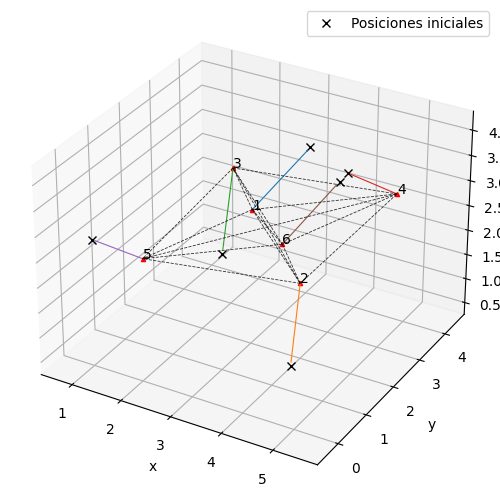

In [47]:
# Constante de ganancia arbitraria
h = 0.5

# Apilamiento de las posiciones iniciales
pstack = np.array([p.flatten()]).T

# Parámetros de tiempo
dt = 0.01
tf = 100
tp = tf / 1000
t = 0

# Inicialización de Pt con valores aleatorios
Pt = 5 * np.random.rand(len(pstack), 1)

# Configuración de la figura 3D
fig = plt.figure(figsize=(5,5), constrained_layout=True)
ax = fig.add_subplot(111, projection='3d')

# Ploteo de las posiciones iniciales
ax.plot(Pt[0::3, 0], Pt[1::3, 0], Pt[2::3, 0], 'xk', linewidth=0.1, label = "Posiciones iniciales")

trajx = []
trajy = []
trajz = []
times = []

# Bucle de integración temporal
while t <= tf:
    t += dt
    if t >= tp:
        # ax.plot(Pt[0::3, 0], Pt[1::3, 0], Pt[2::3, 0], '.', markersize=0.5)
        trajx.append(Pt[0::3, 0])
        trajy.append(Pt[1::3, 0])
        trajz.append(Pt[2::3, 0])
        times.append(t)
        tp += tf / 1000
    # consenso lo ejecuto siempre como referencia
    Pt = Pt - h * np.kron(Omega, np.eye(3)) @ Pt * dt

# Ploteo final de las posiciones
ax.plot(Pt[0::3, 0], Pt[1::3, 0], Pt[2::3, 0], '^r', markersize = 3)


# cmap = plt.get_cmap('Set2')
# norm = plt.Normalize(vmin=0, vmax=np.array(trajx).shape[1] - 1)
# colors = cmap(norm(np.arange(np.array(trajx).shape[1])))
# plt.gca().set_prop_cycle(color=colors)
for i in range(np.array(trajz).shape[1]):
    ax.plot(np.array(trajx)[:,i],np.array(trajy)[:,i],np.array(trajz)[:,i], linewidth = 0.8)

# Adición de etiquetas de nodos y aristas
Pst = np.array([Pt[0::3, 0], Pt[1::3, 0], Pt[2::3, 0]]).T
for i in enumerate(Pst):
    ax.text(i[1][0], i[1][1], i[1][2], str(i[0] + 1))
for i in enumerate(edges):
    ax.plot(Pst[[i[1][0] - 1, i[1][1] - 1], 0], Pst[[i[1][0] - 1, i[1][1] - 1], 1], Pst[[i[1][0] - 1, i[1][1] - 1], 2], 
            color = "black", linestyle = "--", linewidth = 0.6, alpha = 0.8)
# Configuración de los ejes y el título
# ax.set_title("Desde posiciones arbitrarias")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.grid(alpha=0.7, linestyle='--', linewidth=0.3)
plt.legend()
plt.axis("equal")
plt.show()

In [48]:
n = len(vertices)

## Traslación
v = np.array([[1,1,1]]).T
Mtras = np.kron(np.ones((n,1)), v)

## Rotación

def angvel(x,y,z):
    angvelx = x*np.pi/180
    angvely = y*np.pi/180
    angvelz = z*np.pi/180
    return angvelx,angvely,angvelz

angvelx,angvely,angvelz = angvel(1,1,1)

def Wtot(x, y, z):
    return np.array([[0,-z*np.pi/180, y*np.pi/180],[z*np.pi/180, 0, -x*np.pi/180],[-y*np.pi/180, x*np.pi/180, 0]]) # Matriz de velocidad angular en 2D

def Mrbargen(n,W):
    return np.kron(np.eye(n),W) # Rotación

Mrbar = Mrbargen(n, Wtot(0,0,1))

## Escalado
Msbar = np.eye(n*3)

## Shearing (Cizallamiento)
hxy = 1
hyx = 1
hxz = 1
hzx = 1
hyz = 1
hzy = 1
S = np.array([[0,hxy, hxz],[hyx,0, hyz],[hzx, hzy, 0]])
Mslbar = np.kron(np.eye(n), S)

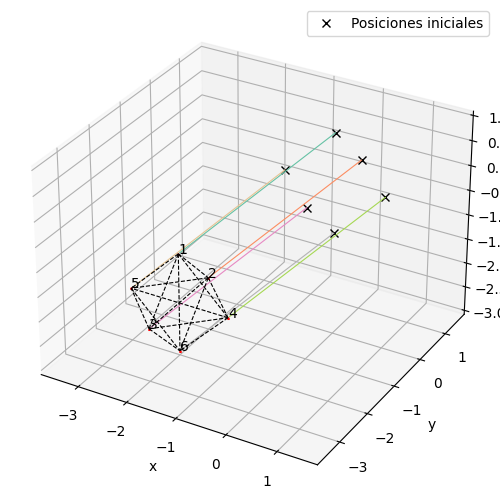

In [49]:
# Constante de ganancia arbitraria
h = 1
k = 0.01

# Apilamiento de las posiciones iniciales
pstack = np.array([p.flatten()]).T

# Parámetros de tiempo
dt = 0.01
tf = 200
tp = tf / 1000
t = 0

# Inicialización de Pt con valores aleatorios
Pt = pstack.copy()

# Configuración de la figura 3D
fig = plt.figure(figsize=(5,5), constrained_layout=True)
ax = fig.add_subplot(111, projection='3d')

# Ploteo de las posiciones iniciales
ax.plot(Pt[0::3, 0], Pt[1::3, 0], Pt[2::3, 0], 'xk', linewidth=0.1, label = "Posiciones iniciales")

trajx = []
trajy = []
trajz = []

# Bucle de integración temporal
while t <= tf:
    t += dt
    if t >= tp:
        # ax.plot(Pt[0::3, 0], Pt[1::3, 0], Pt[2::3, 0], '.', markersize=0.5)
        trajx.append(Pt[0::3, 0])
        trajy.append(Pt[1::3, 0])
        trajz.append(Pt[2::3, 0])
        tp += tf / 100
    # consenso lo ejecuto siempre como referencia
    Pt = Pt - (h*Lbar@Pt + k*Mtras)*dt


# Ploteo final de las posiciones
ax.plot(Pt[0::3, 0], Pt[1::3, 0], Pt[2::3, 0], '^r', markersize=1.2)

cmap = plt.get_cmap('Set2')
norm = plt.Normalize(vmin=0, vmax=np.array(trajx).shape[1] - 1)
colors = cmap(norm(np.arange(np.array(trajx).shape[1])))
plt.gca().set_prop_cycle(color=colors)
for i in range(np.array(trajz).shape[1]):
    ax.plot(np.array(trajx)[:,i],np.array(trajy)[:,i],np.array(trajz)[:,i], linewidth = 0.8)


# Adición de etiquetas de nodos y aristas
Pst = np.array([Pt[0::3, 0], Pt[1::3, 0], Pt[2::3, 0]]).T
for i in enumerate(Pst):
    ax.text(i[1][0], i[1][1], i[1][2], str(i[0] + 1))
for i in enumerate(edges):
    ax.plot(Pst[[i[1][0] - 1, i[1][1] - 1], 0], Pst[[i[1][0] - 1, i[1][1] - 1], 1], Pst[[i[1][0] - 1, i[1][1] - 1], 2], 
            color = "black", linestyle = "--", linewidth = 0.8)

# Configuración de los ejes y el título
# ax.set_title("Traslación diagonal")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.grid(alpha=0.7, linestyle='--', linewidth=0.3)
plt.axis('equal')
plt.legend()
plt.show()

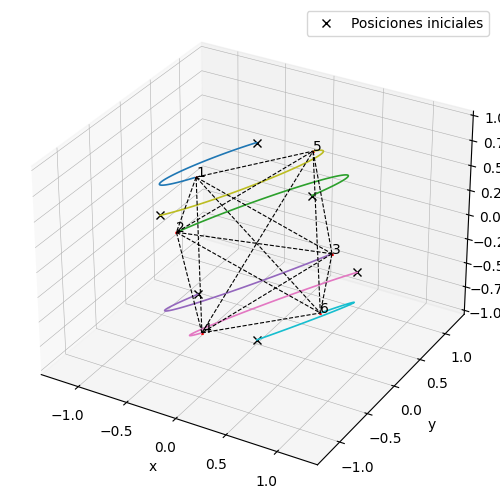

In [50]:
plt.rcParams['grid.linewidth'] = 0.4

# Constante de ganancia arbitraria
h = 1
k = 0.5

Mrbar = Mrbargen(n, Wtot(-1,0.5,1.4)) # Definir las velocidades de giro sobre cada eje

# Apilamiento de las posiciones iniciales
pstack = np.array([p.flatten()]).T

# Parámetros de tiempo
dt = 0.01
tf = 200
tp = tf / 1000
t = 0

# Inicialización de Pt con valores aleatorios
Pt = pstack.copy()

# Configuración de la figura 3D
fig = plt.figure(figsize=(5,5), constrained_layout=True)
ax = fig.add_subplot(111, projection='3d')

# Ploteo de las posiciones iniciales
ax.plot(Pt[0::3, 0], Pt[1::3, 0], Pt[2::3, 0], 'xk', linewidth=0.1, label="Posiciones iniciales")

trajx = []
trajy = []
trajz = []

# Bucle de integración temporal
while t <= tf:
    t += dt
    if t >= tp:
        # ax.plot(Pt[0::3, 0], Pt[1::3, 0], Pt[2::3, 0], '.', markersize=0.5)
        trajx.append(Pt[0::3, 0])
        trajy.append(Pt[1::3, 0])
        trajz.append(Pt[2::3, 0])
        tp += tf / 100
    # consenso lo ejecuto siempre como referencia
    Pt = Pt - (h*Lbar@Pt + k*Mrbar@Pt)*dt

# Ploteo final de las posiciones
ax.plot(Pt[0::3, 0], Pt[1::3, 0], Pt[2::3, 0], '^r', markersize=1.2)

cmap = plt.get_cmap('tab10')
norm = plt.Normalize(vmin=0, vmax=np.array(trajx).shape[1] - 1)
colors = cmap(norm(np.arange(np.array(trajx).shape[1])))
plt.gca().set_prop_cycle(color=colors)
for i in range(np.array(trajz).shape[1]):
    ax.plot(np.array(trajx)[:,i],np.array(trajy)[:,i],np.array(trajz)[:,i], linewidth = 1.2)

# Adición de etiquetas de nodos y aristas
Pst = np.array([Pt[0::3, 0], Pt[1::3, 0], Pt[2::3, 0]]).T
for i in enumerate(Pst):
    ax.text(i[1][0], i[1][1], i[1][2], str(i[0] + 1))
for i in enumerate(edges):
    ax.plot(Pst[[i[1][0] - 1, i[1][1] - 1], 0], Pst[[i[1][0] - 1, i[1][1] - 1], 1], Pst[[i[1][0] - 1, i[1][1] - 1], 2], 
            color = "black", linestyle = "--", linewidth = 0.8)

# Configuración de los ejes y el título
# ax.set_title("Rotación")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.legend()
plt.axis("equal")
plt.show()

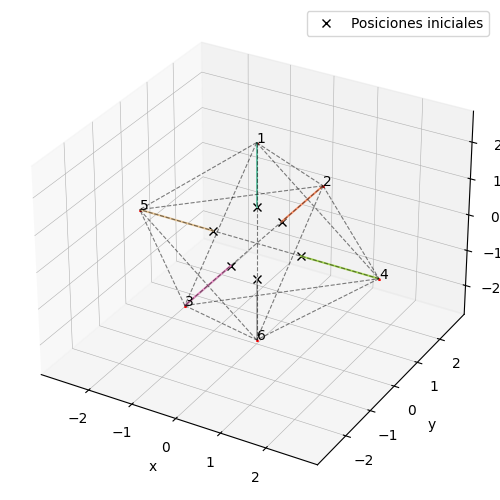

In [51]:
# Constante de ganancia arbitraria
h = 1
k = -0.005

# Apilamiento de las posiciones iniciales
pstack = np.array([p.flatten()]).T

# Parámetros de tiempo
dt = 0.01
tf = 200
tp = tf / 1000
t = 0

# Inicialización de Pt con valores aleatorios
Pt = pstack.copy()

# Configuración de la figura 3D
fig = plt.figure(figsize=(5,5), constrained_layout=True)
ax = fig.add_subplot(111, projection='3d')

# Ploteo de las posiciones iniciales
ax.plot(Pt[0::3, 0], Pt[1::3, 0], Pt[2::3, 0], 'xk', linewidth=0.1, label = "Posiciones iniciales")

trajx = []
trajy = []
trajz = []

# Bucle de integración temporal
while t <= tf:
    t += dt
    if t >= tp:
        # ax.plot(Pt[0::3, 0], Pt[1::3, 0], Pt[2::3, 0], '.', markersize=0.5)
        trajx.append(Pt[0::3, 0])
        trajy.append(Pt[1::3, 0])
        trajz.append(Pt[2::3, 0])
        tp += tf / 100
    # consenso lo ejecuto siempre como referencia
    Pt = Pt - (h*Lbar@Pt + k*Msbar@Pt)*dt

# Ploteo final de las posiciones
ax.plot(Pt[0::3, 0], Pt[1::3, 0], Pt[2::3, 0], '^r', markersize=1.2)

cmap = plt.get_cmap('Set2')
norm = plt.Normalize(vmin=0, vmax=np.array(trajx).shape[1] - 1)
colors = cmap(norm(np.arange(np.array(trajx).shape[1])))
plt.gca().set_prop_cycle(color=colors)
for i in range(np.array(trajz).shape[1]):
    ax.plot(np.array(trajx)[:,i],np.array(trajy)[:,i],np.array(trajz)[:,i], linewidth = 1.4)

# Adición de etiquetas de nodos y aristas
Pst = np.array([Pt[0::3, 0], Pt[1::3, 0], Pt[2::3, 0]]).T
for i in enumerate(Pst):
    ax.text(i[1][0], i[1][1], i[1][2], str(i[0] + 1))
for i in enumerate(edges):
    ax.plot(Pst[[i[1][0] - 1, i[1][1] - 1], 0], Pst[[i[1][0] - 1, i[1][1] - 1], 1], Pst[[i[1][0] - 1, i[1][1] - 1], 2], 
            color = "black", linestyle = "--", linewidth = 0.8, alpha = 0.5)


# Configuración de los ejes y el título
# ax.set_title("Escalado positivo")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.grid(alpha=0.7, linestyle='--', linewidth=0.3)
plt.legend()
plt.show()

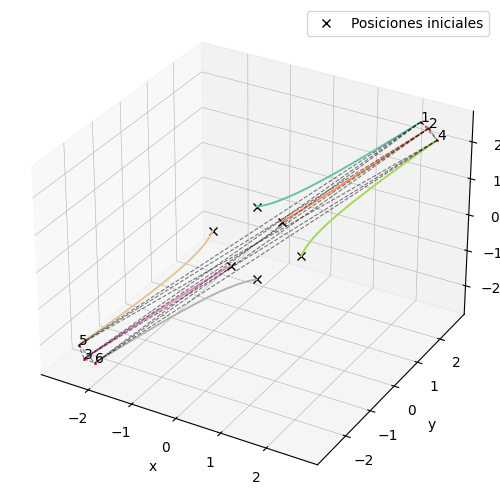

In [52]:
# Constante de ganancia arbitraria
h = 1
k = -0.005

# Apilamiento de las posiciones iniciales
pstack = np.array([p.flatten()]).T

# Parámetros de tiempo
dt = 0.01
tf = 200
tp = tf / 1000
t = 0

# Inicialización de Pt con valores aleatorios
Pt = pstack.copy()

# Configuración de la figura 3D
fig = plt.figure(figsize=(5,5), constrained_layout=True)
ax = fig.add_subplot(111, projection='3d')

# Ploteo de las posiciones iniciales
ax.plot(Pt[0::3, 0], Pt[1::3, 0], Pt[2::3, 0], 'xk', linewidth=0.1, label = "Posiciones iniciales")

trajx = []
trajy = []
trajz = []

# Bucle de integración temporal
while t <= tf:
    t += dt
    if t >= tp:
        # ax.plot(Pt[0::3, 0], Pt[1::3, 0], Pt[2::3, 0], '.', markersize=0.5)
        trajx.append(Pt[0::3, 0])
        trajy.append(Pt[1::3, 0])
        trajz.append(Pt[2::3, 0])
        tp += tf / 100
    # consenso lo ejecuto siempre como referencia
    Pt = Pt - (h*Lbar@Pt + k*Mslbar@Pt)*dt

# Ploteo final de las posiciones
ax.plot(Pt[0::3, 0], Pt[1::3, 0], Pt[2::3, 0], '^r', markersize=1.2)

cmap = plt.get_cmap('Set2')
norm = plt.Normalize(vmin=0, vmax=np.array(trajx).shape[1] - 1)
colors = cmap(norm(np.arange(np.array(trajx).shape[1])))
plt.gca().set_prop_cycle(color=colors)
for i in range(np.array(trajz).shape[1]):
    ax.plot(np.array(trajx)[:,i],np.array(trajy)[:,i],np.array(trajz)[:,i], linewidth = 1.4)
    
# Adición de etiquetas de nodos y aristas
Pst = np.array([Pt[0::3, 0], Pt[1::3, 0], Pt[2::3, 0]]).T
for i in enumerate(Pst):
    ax.text(i[1][0], i[1][1], i[1][2], str(i[0] + 1))
for i in enumerate(edges):
    ax.plot(Pst[[i[1][0] - 1, i[1][1] - 1], 0], Pst[[i[1][0] - 1, i[1][1] - 1], 1], Pst[[i[1][0] - 1, i[1][1] - 1], 2], 
            color = "black", linestyle = "--", linewidth = 0.8, alpha = 0.5)

# Configuración de los ejes y el título
# ax.set_title("Cizallamiento sobre los tres ejes")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.grid(alpha=0.7, linestyle='--', linewidth=0.3)
plt.legend()
plt.show()

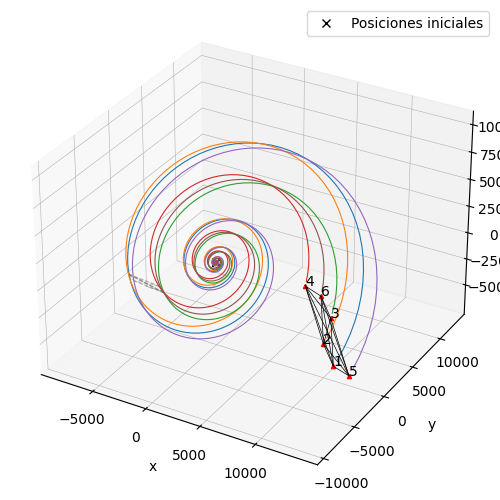

In [55]:
plt.close()
# Constante de ganancia arbitraria
h = 0.5
kt = -0.35 # Ganancia de traslación
ks = -0.008 # Ganancia del scaling
kr = 2 # Ganancia de la rotación

Mrbar = Mrbargen(n, Wtot(0,-1,1))

# Apilamiento de las posiciones iniciales
pstack = np.array([p.flatten()]).T

# Parámetros de tiempo
dt = 0.01
tf = 800
tp = tf / 1000
t = 0
tp2 = tf*0.9

# Inicialización de Pt con valores aleatorios
Pt = 15 * np.random.rand(len(pstack), 1)

# Configuración de la figura 3D
fig = plt.figure(figsize=(5,5), constrained_layout=True)
ax = fig.add_subplot(111, projection='3d')

# Ploteo de las posiciones iniciales
ax.plot(Pt[0::3, 0], Pt[1::3, 0], Pt[2::3, 0], 'xk', linewidth=0.1, label = "Posiciones iniciales")

trajx = []
trajy = []
trajz = []

# Bucle de integración temporal
while t <= tf:
    t += dt

    if t >= tp2:
        Pst = np.array([Pt[0::3, 0], Pt[1::3, 0], Pt[2::3, 0]]).T
        for i in enumerate(edges):
            ax.plot(Pst[[i[1][0] - 1, i[1][1] - 1], 0], Pst[[i[1][0] - 1, i[1][1] - 1], 1], Pst[[i[1][0] - 1, i[1][1] - 1], 2], 
                    color = "gray", linestyle = "--", linewidth = 0.8, alpha = 0.4)
        tp2 = tf+1

    if t >= tp:
        # ax.plot(Pt[0::3, 0], Pt[1::3, 0], Pt[2::3, 0], '.', color = "gray", markersize=0.5)
        trajx.append(Pt[0::3, 0])
        trajy.append(Pt[1::3, 0])
        trajz.append(Pt[2::3, 0])
        tp += tf / 500
    # consenso lo ejecuto siempre como referencia
    Pt = Pt - (h*Lbar@Pt + (ks*Msbar+ kr*Mrbar)@Pt + kt*Mtras)*dt

# Ploteo final de las posiciones
ax.plot(Pt[0::3, 0], Pt[1::3, 0], Pt[2::3, 0], '^r', markersize = 3)


# cmap = plt.get_cmap('tab10')
# norm = plt.Normalize(vmin=0, vmax=np.array(trajx).shape[1] - 1)
# colors = cmap(norm(np.arange(np.array(trajx).shape[1])))
# plt.gca().set_prop_cycle(color=colors)
for i in range(np.array(trajz).shape[1]):
    ax.plot(np.array(trajx)[:,i],np.array(trajy)[:,i],np.array(trajz)[:,i], linewidth = 0.8)

# Adición de etiquetas de nodos y aristas
Pst = np.array([Pt[0::3, 0], Pt[1::3, 0], Pt[2::3, 0]]).T
for i in enumerate(Pst):
    ax.text(i[1][0], i[1][1], i[1][2], str(i[0] + 1))
for i in enumerate(edges):
    ax.plot(Pst[[i[1][0] - 1, i[1][1] - 1], 0], Pst[[i[1][0] - 1, i[1][1] - 1], 1], Pst[[i[1][0] - 1, i[1][1] - 1], 2], 
            color = "black", linestyle = "-", linewidth = 0.5)

# Configuración de los ejes y el título
# ax.set_title("Traslación, escalado y rotación desde posiciones arbitrarias")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.legend(loc = 'best')
plt.grid(alpha=0.7, linestyle='--', linewidth=0.3)
plt.axis("equal")
plt.show()


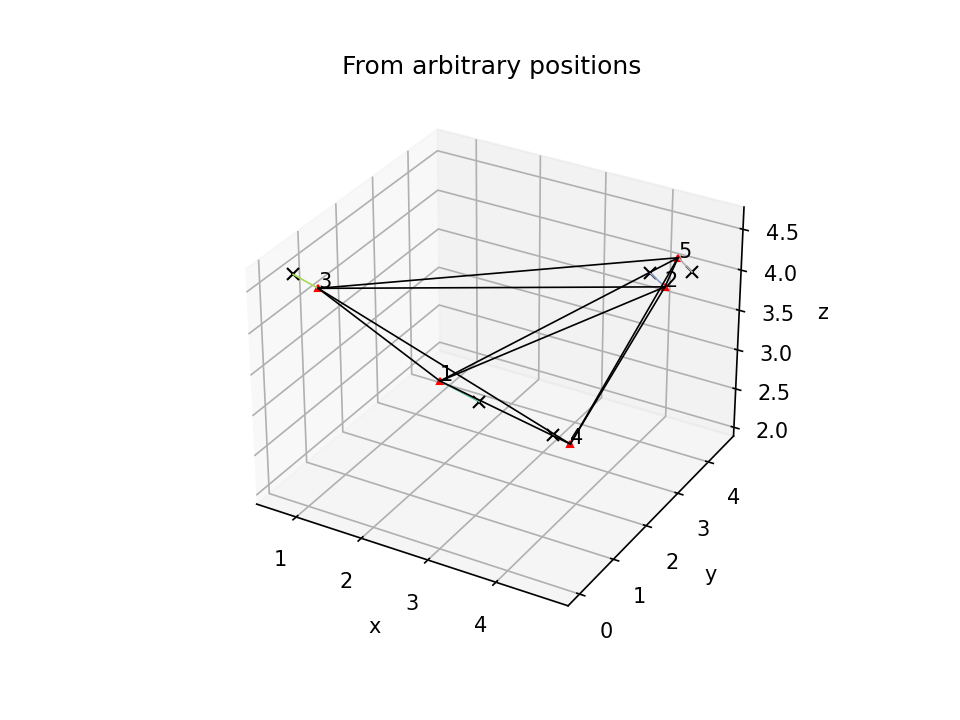

No such comm: 062dd8d320ec476585bf8e275fcaea39


No such comm: d275e87ed3e3451fb9fb9ab60038d8b2


No such comm: 0b7ccd169ad74dd088b6c9db54209ff8


No such comm: 1ff236ae661b4d6094cfae4a53a8cb3c


No such comm: b40cffaf84d341a9ae63f8a420166db9


No such comm: 29fc136a2ff74488a32d6db4f282087a


No such comm: 039fb8b3b8344c619a23fc65a27ed5dd


No such comm: 0db48f8cd6d34b29865932967670dad0


No such comm: 49a1ecc7272d421ca4e6f00bd5756d19


No such comm: d3b20f8dcc394be29f7084e1376dc26c


No such comm: 831c53bd2d0c479a8ae266dbcc458753


No such comm: e0fcfe9efd134ec0b1a298a16ed9ee14


No such comm: 94896778e1e246fe9251dff3c407131c


No such comm: 3e5ac325aaea4c38aee7d21dcc668b29


No such comm: 488ba562e48541ca9d36073a80d8b581


No such comm: 190d858b687242ca8a8b207c371fe567


No such comm: 98d64c5fd75648978c1b187b9ce52824


No such comm: 10c9e9fc47d24cc382db49796ba598bf


No such comm: 6657123a62fb40efb53928808695bfdc


No such comm: b1a911ddf8424b4f9c86efb7502b1156


No such comm: 8306fe03c103451084a19a0aa80f3032


No such comm: 7fb4750958684205a5b3c65cfe44e508


No such comm: c040db7af68c4d0b8a550d2db3a062fe


No such comm: 5f57a156794249949954094758373b1c


No such comm: 34c48ab3c05143e5a7fdb1fe8aa5d01a


No such comm: c9153d834612455597fdeae4b22f0f8f


In [ ]:
# Constante de ganancia arbitraria
h = 0.1

# Apilamiento de las posiciones iniciales
pstack = np.array([p.flatten()]).T

# Parámetros de tiempo
dt = 0.01
tf = 100
tp = tf / 1000
t = 0

# Inicialización de Pt con valores aleatorios
Pt = 5 * np.random.rand(len(pstack), 1)

# Configuración de la figura 3D
fig = plt.figure(dpi=150)
ax = fig.add_subplot(111, projection='3d')

# Ploteo de las posiciones iniciales
ax.plot(Pt[0::3, 0], Pt[1::3, 0], Pt[2::3, 0], 'xk', linewidth=0.1)

trajx = []
trajy = []
trajz = []
times = []

# Bucle de integración temporal
while t <= tf:
    t += dt
    if t >= tp:
        # ax.plot(Pt[0::3, 0], Pt[1::3, 0], Pt[2::3, 0], '.', markersize=0.5)
        trajx.append(Pt[0::3, 0])
        trajy.append(Pt[1::3, 0])
        trajz.append(Pt[2::3, 0])
        times.append(t)
        tp += tf / 1000
    # consenso lo ejecuto siempre como referencia
    Pt = Pt - h * np.kron(Omega, np.eye(3)) @ Pt * dt

# Ploteo final de las posiciones
ax.plot(Pt[0::3, 0], Pt[1::3, 0], Pt[2::3, 0], '^r', markersize = 3)


cmap = plt.get_cmap('Set2')
norm = plt.Normalize(vmin=0, vmax=np.array(trajx).shape[1] - 1)
colors = cmap(norm(np.arange(np.array(trajx).shape[1])))
plt.gca().set_prop_cycle(color=colors)
for i in range(np.array(trajz).shape[1]):
    ax.plot(np.array(trajx)[:,i],np.array(trajy)[:,i],np.array(trajz)[:,i], linewidth = 0.8)

# Adición de etiquetas de nodos y aristas
Pst = np.array([Pt[0::3, 0], Pt[1::3, 0], Pt[2::3, 0]]).T
for i in enumerate(Pst):
    ax.text(i[1][0], i[1][1], i[1][2], str(i[0] + 1))
for i in enumerate(edges):
    ax.plot(Pst[[i[1][0] - 1, i[1][1] - 1], 0], Pst[[i[1][0] - 1, i[1][1] - 1], 1], Pst[[i[1][0] - 1, i[1][1] - 1], 2], 
            color = "black", linestyle = "-", linewidth = 0.8)
# Configuración de los ejes y el título
# ax.set_title("From arbitrary positions")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.grid(alpha=0.7, linestyle='--', linewidth=0.3)
plt.show()

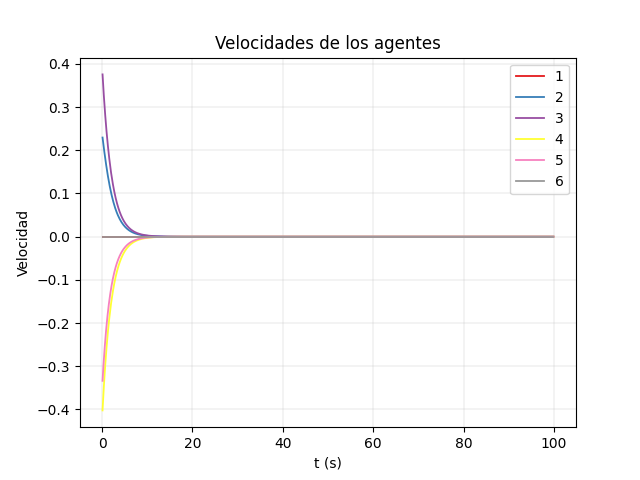

In [ ]:
x = np.array(trajx)
y = np.array(trajy)
z = np.array(trajz)

r = [0]*x.shape[1]
for i in range(len(r)):
    vect = np.array([x[:,i],y[:,i],z[:,i]])
    norms = np.array([])
    for j in range(vect.shape[1]):
        norms = np.append(norms,np.linalg.norm(vect[:,j]))
    r[i] = norms
r = np.array(r)

tq = np.array(times)
vel = [0]*x.shape[1]

plt.figure()
cmap = plt.get_cmap('Set1')
norm = plt.Normalize(vmin=0, vmax=np.array(trajx).shape[1] - 1)
colors = cmap(norm(np.arange(np.array(trajx).shape[1])))
plt.gca().set_prop_cycle(color=colors)
for i in range(x.shape[1]):
    vel[i] = np.diff(r[i,:])/np.diff(tq)
    plt.plot(tq[:-1] ,vel[i], label = i+1, linewidth = 1.3)

plt.title("Velocidades de los agentes")
plt.xlabel("t (s)")
plt.ylabel("Velocidad")
plt.grid(linewidth=0.2)
plt.legend()
plt.show()